In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt 

from dedalus import public as de
from dedalus.extras import plot_tools
from dedalus.extras.plot_tools import plot_bot_2d

In [29]:
# Domain
L = 2 * np.pi
H = L

nx = 128
nz = 128

In [30]:
# Create bases and domain
x_basis = de.Fourier('x',   nx, interval=(-L/2, L/2))
z_basis = de.Chebyshev('z', nz, interval=(-H, 0)) 

domain = de.Domain([x_basis, z_basis], grid_dtype=np.float64)

2020-04-06 11:48:54,543 pencil 0/1 INFO :: Building pencil matrix 1/64 (~2%) Elapsed: 0s, Remaining: 1s, Rate: 9.5e+01/s
2020-04-06 11:48:54,603 pencil 0/1 INFO :: Building pencil matrix 7/64 (~11%) Elapsed: 0s, Remaining: 1s, Rate: 9.9e+01/s
2020-04-06 11:48:54,658 pencil 0/1 INFO :: Building pencil matrix 14/64 (~22%) Elapsed: 0s, Remaining: 0s, Rate: 1.1e+02/s
2020-04-06 11:48:54,711 pencil 0/1 INFO :: Building pencil matrix 21/64 (~33%) Elapsed: 0s, Remaining: 0s, Rate: 1.2e+02/s
2020-04-06 11:48:54,761 pencil 0/1 INFO :: Building pencil matrix 28/64 (~44%) Elapsed: 0s, Remaining: 0s, Rate: 1.2e+02/s
2020-04-06 11:48:54,811 pencil 0/1 INFO :: Building pencil matrix 35/64 (~55%) Elapsed: 0s, Remaining: 0s, Rate: 1.3e+02/s
2020-04-06 11:48:54,864 pencil 0/1 INFO :: Building pencil matrix 42/64 (~66%) Elapsed: 0s, Remaining: 0s, Rate: 1.3e+02/s
2020-04-06 11:48:54,912 pencil 0/1 INFO :: Building pencil matrix 49/64 (~77%) Elapsed: 0s, Remaining: 0s, Rate: 1.3e+02/s
2020-04-06 11:48:54

(<matplotlib.axes._axes.Axes at 0x1393e38b0>,
 <matplotlib.axes._axes.Axes at 0x13940cdc0>)

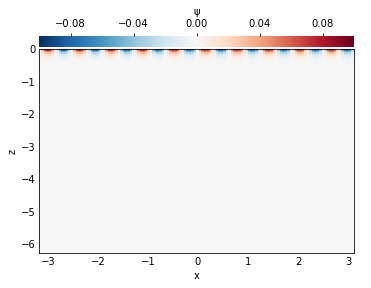

In [33]:
problem = de.LBVP(domain, variables=['ψ', 'ψz'])

problem.add_equation("dx(dx(ψ)) + dz(ψz) = 0",
                     condition="(nx != 0)")

problem.add_equation("ψ = 0", condition="(nx == 0)")
problem.add_equation("ψz = 0", condition="(nx == 0)")
problem.add_equation("dz(ψ) - ψz = 0", condition="(nx != 0)")

problem.add_bc("left(ψz) = 0", condition="(nx != 0)")
problem.add_bc("right(ψz) = sin(10*x)", condition="(nx != 0)")

# Build solver
solver = problem.build_solver()
solver.solve()

ψ = solver.state['ψ']
ψ.require_grid_space()
plot_bot_2d(ψ)